Cluster featmat

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import time
import os
import pickle

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [15]:
matfile = '/Users/bogao/DataFiles/new landscape/data/all_bands.pkl'
labelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_label.pkl'
with open(matfile, 'rb') as fmat, open(labelfile, 'rb') as flab:
    data = pickle.load(fmat)
    labels = pickle.load(flab)

In [6]:
data = preprocessing.MinMaxScaler().fit_transform(np.abs(data))

### PCA

In [16]:
time_start = time.time()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 1.8227031230926514 seconds
Variance explained per principal component: [0.16740814 0.03819481]


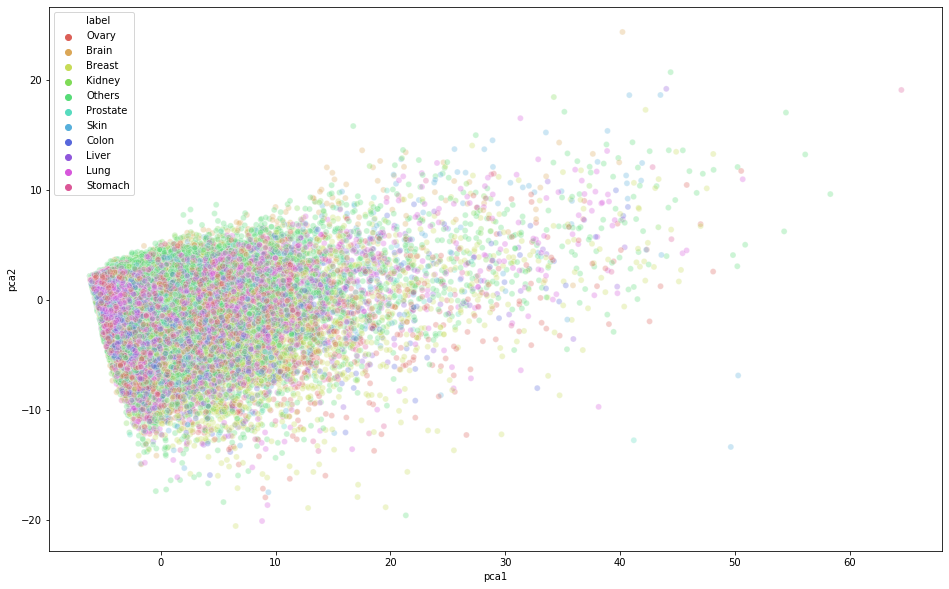

In [17]:
pca_df = pd.DataFrame(pca_result, columns = ['pca1','pca2'])
pca_df['label'] = labels

plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="pca1", y="pca2",
    hue="label",
    palette=sns.color_palette("hls", np.unique(labels).shape[0]),
    data=pca_df,
    legend="full",
    alpha=0.3
)

### TSNE

In [19]:
RS = 1234

# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(data)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 3.256706714630127 seconds
Variance explained per principal component: [0.16740814 0.03819481 0.02874536 0.02674902 0.02376474 0.02259023
 0.02001555 0.01876455 0.01814234 0.01675039 0.01579243 0.0154919
 0.01378402 0.01264811 0.01227378 0.01181437 0.01022898 0.00961117
 0.00941984 0.0081754  0.00729005 0.00722704 0.00694037 0.00660105
 0.00637841 0.00616784 0.00597664 0.00578866 0.00561338 0.00536478
 0.0052378  0.00513691 0.00489805 0.00471859 0.00453378 0.00430254
 0.00427893 0.00418568 0.00395381 0.00392427 0.00381913 0.00370243
 0.00346152 0.00339497 0.00326744 0.00320401 0.00306038 0.00302109
 0.00296973 0.00285441]


In [20]:
# TSNE
time_start = time.time()
pca_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 912.0289390087128 seconds


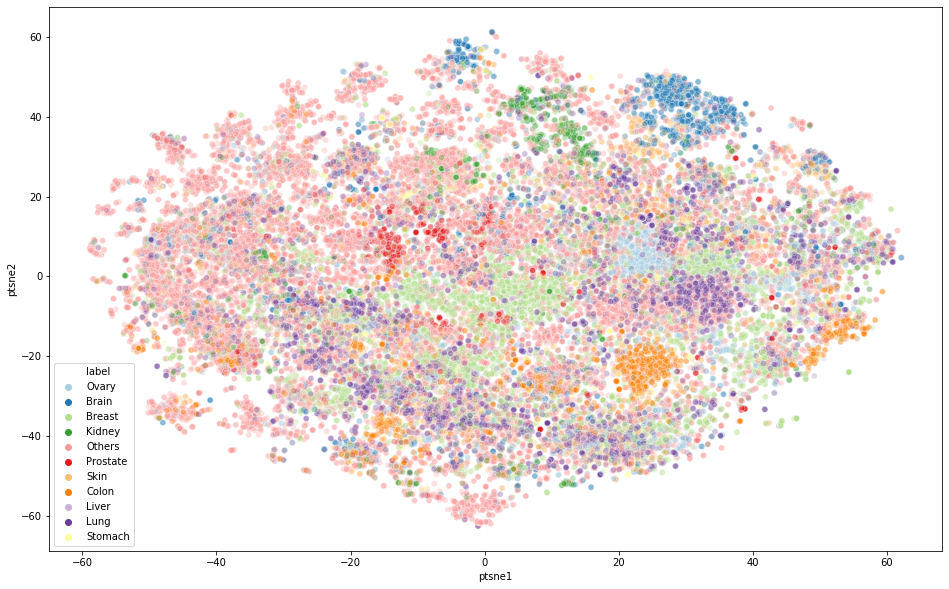

In [23]:
# plot
df = pd.DataFrame(pca_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = labels
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("Paired", len(set(labels))),
    data=df,
    legend="full",
    alpha=0.3
)

### Data without site=='Others' and 'Breast'

In [30]:
data[labels=='Others'].shape

(20043, 1622)

In [31]:
sum(labels=='Others')

20043

In [50]:
dd = data[(labels != 'Others') & (labels !=  'Breast')]

In [51]:
dd.shape

(16533, 1622)

#### TSNE

In [52]:
RS = 1234

# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dd)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 1.1575160026550293 seconds
Cumulative explained variation for 50 principal components: 0.6654813036206292


In [53]:
# TSNE
time_start = time.time()
pca_tsne = TSNE(random_state=RS, perplexity=45).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 320.22656321525574 seconds


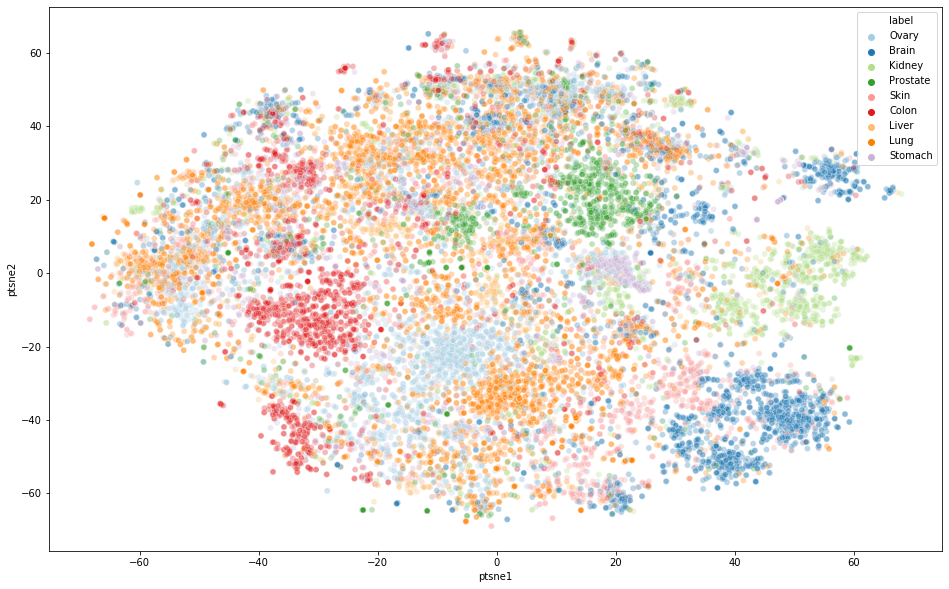

In [65]:
# plot
df = pd.DataFrame(pca_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = labels[(labels != 'Others') & (labels !=  'Breast')]
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("Paired", len(set(labels))-2),
    data=df,
    legend="full",
    alpha=0.3
)

In [39]:
labels[labels != 'Others'].shape

(22777,)

#### Without Others

In [56]:
dd = data[labels != 'Others']

In [57]:
RS = 1234

# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dd)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 1.7472219467163086 seconds
Cumulative explained variation for 50 principal components: 0.6606917511389823


In [58]:
# TSNE
time_start = time.time()
dd_tsne = TSNE(random_state=RS, perplexity=40).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 431.5072786808014 seconds


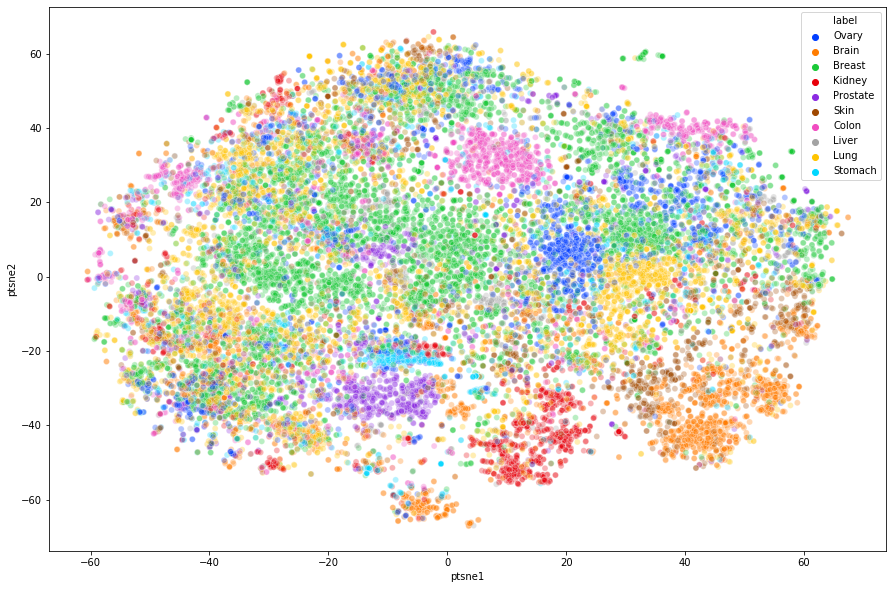

In [71]:
# plot
df = pd.DataFrame(dd_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = labels[labels != 'Others']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(labels))-1),
    data=df,
    legend="full",
    alpha=0.3
)

### Disease label

In [78]:

dlabelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_disease_label.pkl'
with open(dlabelfile, 'rb') as fi:
    disease_labels = pickle.load(fi)

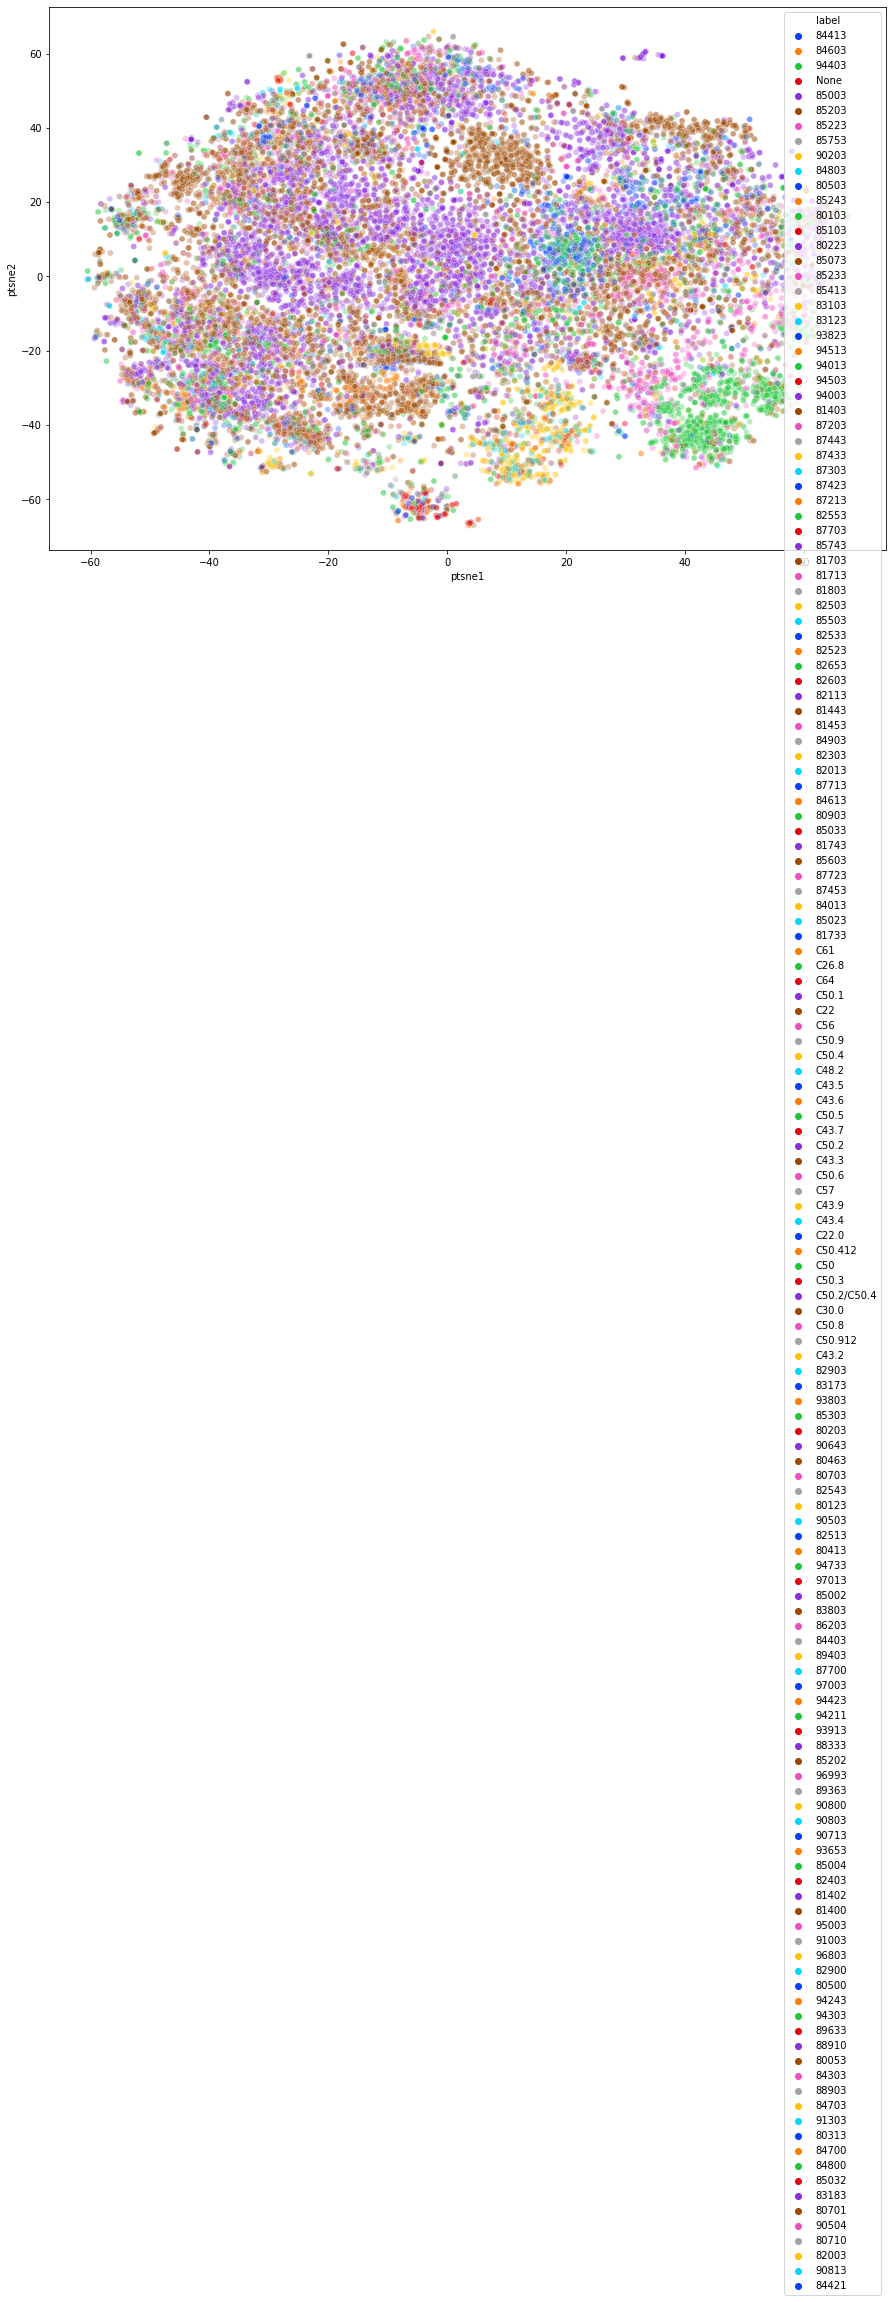

In [79]:
# plot
df = pd.DataFrame(dd_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = disease_labels[disease_labels != 'Others']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(disease_labels))-1),
    data=df,
    legend="full",
    alpha=0.3
)

In [75]:
len(set(disease_labels))

244

In [76]:
np.unique(disease_labels)

TypeError: '<' not supported between instances of 'NoneType' and 'str'

In [77]:
disease_labels

array(['84413', '84413', '84413', ..., '84421', '84421', '84421'],
      dtype=object)